## Basic Information - from Kaggle

- https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

- age: age of the patient [years]
- sex: sex of the patient [M: Male, F: Female]
- chest_pain_type: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- resting_bp: resting blood pressure [mm Hg]
- cholesterol: serum cholesterol [mm/dl]
- fasting_bp: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- reasting_ecg: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- max_hr: maximum heart rate achieved [Numeric value between 60 and 202]
- exercise_angina: exercise-induced angina [Y: Yes, N: No]
- oldpeak: oldpeak = ST [Numeric value measured in depression]
- st_slopee: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- heart_disease: output class [1: heart disease, 0: Normal]


### NOTE
- After data encoding..
- sex [M, F] --> [0, 1]
- chest_pain_type [TA, ATA, NAP, ASY] --> [0, 1, 2, 3]
- resting_ecg [Normal, ST, LVH] --> [0, 1, 2]
- exercise_angina [N, Y] --> [0, 1]
- st_slope [Up, Flat, Down] --> [0, 1, 2]

In [9]:
import pandas as pd
import numpy as np
import math

def read_data(data_path, column_names):
    """
    
    Processes a data file into Pandas.
    
    Params:
    data_path = file location for a dataset
    column_names = desired column names for the dataset
    
    Return:
    Pandas dataframe of specified file and column names. 
    
    """
    dataframe = pd.read_csv(data_path)
    dataframe.columns = column_names
    return dataframe

heart_failure_data_path = 'datasets/heart_disease.csv'
heart_failure_column_names = [
    'age',
    'sex',
    'chest_pain_type',
    'resting_bp',
    'cholesterol',
    'fasting_bp',
    'resting_ecg',
    'max_hr',
    'exercise_angina',
    'oldpeak',
    'st_slope',
    'heart_disease'
]

heart_failure_df = read_data(
    heart_failure_data_path,
    heart_failure_column_names
)


In [13]:
heart_failure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              918 non-null    int64  
 1   sex              918 non-null    object 
 2   chest_pain_type  918 non-null    object 
 3   resting_bp       918 non-null    int64  
 4   cholesterol      918 non-null    int64  
 5   fasting_bp       918 non-null    int64  
 6   resting_ecg      918 non-null    object 
 7   max_hr           918 non-null    int64  
 8   exercise_angina  918 non-null    object 
 9   oldpeak          918 non-null    float64
 10  st_slope         918 non-null    object 
 11  heart_disease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
heart_failure_df

age sex chest_pain_type  resting_bp  cholesterol  fasting_bp resting_ecg  \
0     40   M             ATA         140          289           0      Normal   
1     49   F             NAP         160          180           0      Normal   
2     37   M             ATA         130          283           0          ST   
3     48   F             ASY         138          214           0      Normal   
4     54   M             NAP         150          195           0      Normal   
..   ...  ..             ...         ...          ...         ...         ...   
913   45   M              TA         110          264           0      Normal   
914   68   M             ASY         144          193           1      Normal   
915   57   M             ASY         130          131           0      Normal   
916   57   F             ATA         130          236           0         LVH   
917   38   M             NAP         138          175           0      Normal   

     max_hr exercise_angina  oldpeak st_slope  heart_disease  
0       172               N      0.0       Up              0  
1       156               N      1.0     Flat              1  
2        98               N      0.0       Up              0  
3       108               Y      1.5     Flat              1  
4       122               N      0.0       Up              0  
..      ...             ...      ...      ...            ...  
913     132               N      1.2     Flat              1  
914     141               N      3.4     Flat              1  
915     115               Y      1.2     Flat              1  
916     174               N      0.0     Flat              1  
917     173               N      0.0       Up              0  

[918 rows x 12 columns]

### Notes

- Angina = chest pain that happens when there isn't enough blood going to part of your heart.
- ST Depression (oldpeak) is a finding on an electrocardiogram where the visualization of ST is below an industry recognized baseline value, often indicitive of myocardial ischemnia. 
- The 'heart_disease' column is the "target" column, or the value that we are going to try to predict later on: whether or not a patient will have heart disease based on their other features. 

# Next Steps

- I am now going to check for any missing data values (which could potentially interfere with application to our algorithm later on), and get a sense of what each of these variables looks like. 
- To do this, I'm going to use Pandas' built in value_counts() function on each of the columns to see what each of their possible values are (if some are null, delete the corresponding rows). 

In [8]:
heart_failure_df['chest_pain_type'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: chest_pain_type, dtype: int64

#### Above is an example of an ideal feature, each of the rows of the dataset is accounted for within a range of acceptable variables (Strings ASY, NAP, ATA, TA). 

In [10]:
heart_failure_df['sex'].value_counts()

M    725
F    193
Name: sex, dtype: int64

In [11]:
heart_failure_df['resting_bp'].value_counts()

120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: resting_bp, Length: 67, dtype: int64

In [12]:
heart_failure_df['cholesterol'].value_counts()

0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: cholesterol, Length: 222, dtype: int64

In [14]:
heart_failure_df['fasting_bp'].value_counts()

0    704
1    214
Name: fasting_bp, dtype: int64

In [15]:
heart_failure_df['resting_ecg'].value_counts()

Normal    552
LVH       188
ST        178
Name: resting_ecg, dtype: int64

In [16]:
heart_failure_df['exercise_angina'].value_counts()

N    547
Y    371
Name: exercise_angina, dtype: int64

In [19]:
heart_failure_df['st_slope'].value_counts()

Flat    460
Up      395
Down     63
Name: st_slope, dtype: int64

## Data Visualization

In [25]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

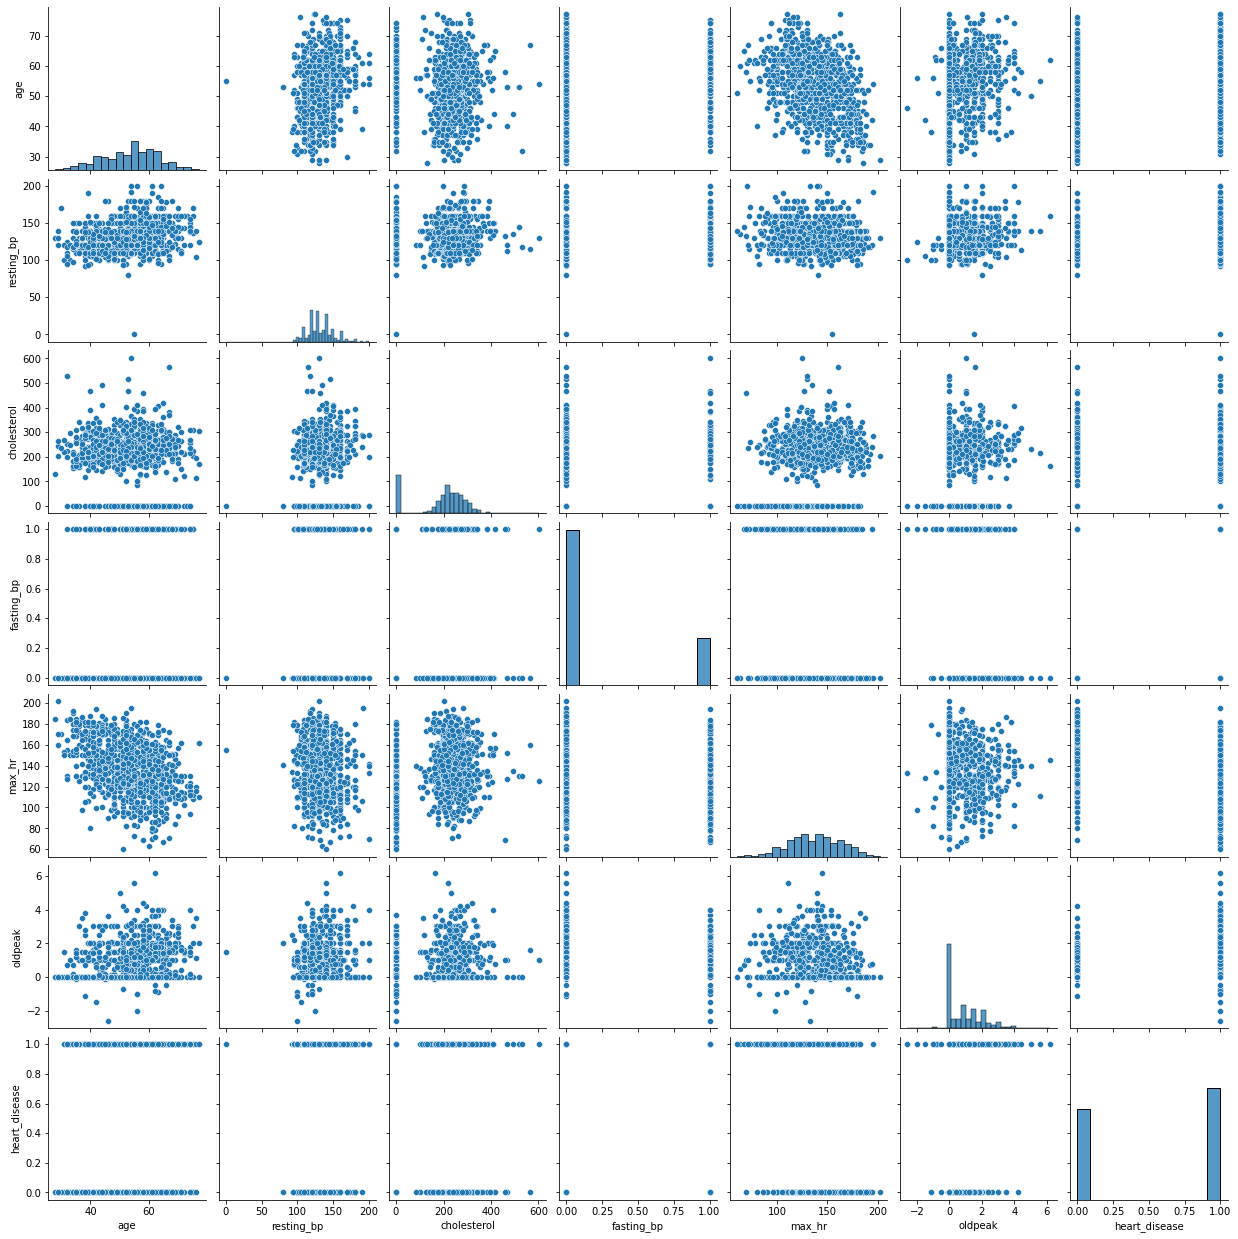

In [21]:
sns.pairplot(heart_failure_df)

Here we can begin to get an understanding of which of our continuous features might have relationships, looking for any strong connections, for example there appears to be some relationship between max_hr and age, which intuitively makes sense. 

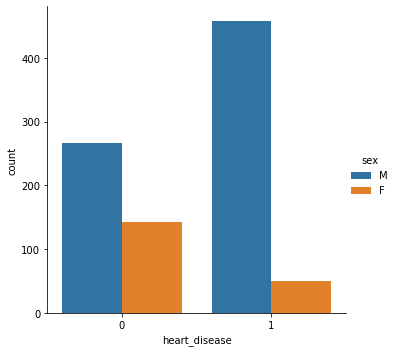

In [32]:
sns.catplot(x="heart_disease", hue="sex", data=heart_failure_df, kind="count")

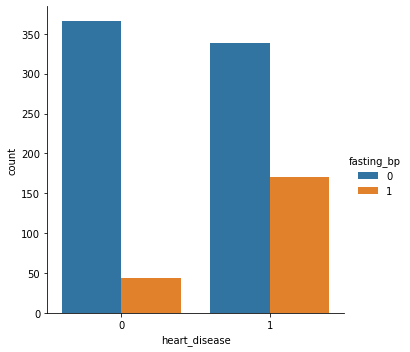

In [34]:
sns.catplot(x="heart_disease", hue="fasting_bp", data=heart_failure_df, kind="count")

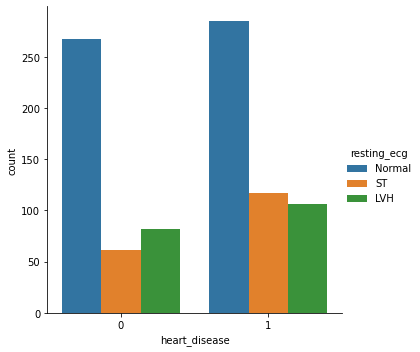

In [35]:
sns.catplot(x="heart_disease", hue="resting_ecg", data=heart_failure_df, kind="count")

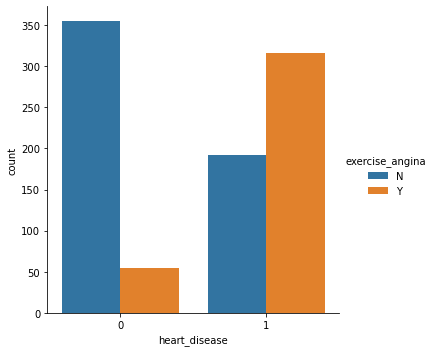

In [36]:
sns.catplot(x="heart_disease", hue="exercise_angina", data=heart_failure_df, kind="count")

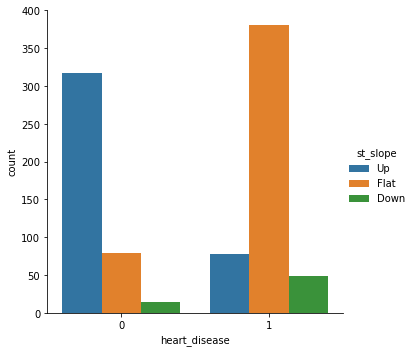

In [38]:
sns.catplot(x="heart_disease", hue="st_slope", data=heart_failure_df, kind="count")

## Notes - Data Visualization

Saving more in depth analysis for now, we can begin to see that indeed there are some very strong relationships between some of our features here, for example among those with heart failure we can see drastic difference in counts of st_slope categories, and exercise_angina responses. For now this is the extent of the EDA I'm going to perform, as the real focus of this assignment is not going to be accuracy of predicitions and variable selection, I'm just going to use every variable regardless of relevance and analyze performance changes. 

## Data Transformation
Lastly, as I'm sure you can imagine, I must do some standardizing of values in order for everything to fit into our data pipeline, for example everything will be much easier to process if everything holds integer or double values, so I'm going to translate my String valued categorical variables (st_slope's [up, flat, down] into a nominal encoding of [0, 1, 2]). 

In [39]:
def encode_ordinal(column, element_list):
    """
    Encodes an ordinal categorical feature into integer tokens

    Parameters
    ----------
    column : column of ordinal features to encode 
    element_list : list of possible elements in the input column (order mattering)

    Returns
    -------
    column : column of encoded values

    """
    
    for i in range(len(column)):
        for j in range(len(element_list)):
            if(column[i] == element_list[j]):
                column[i] = (int)(j)
            
    return pd.to_numeric(column)

In [40]:
heart_failure_df

age sex chest_pain_type  resting_bp  cholesterol  fasting_bp resting_ecg  \
0     40   M             ATA         140          289           0      Normal   
1     49   F             NAP         160          180           0      Normal   
2     37   M             ATA         130          283           0          ST   
3     48   F             ASY         138          214           0      Normal   
4     54   M             NAP         150          195           0      Normal   
..   ...  ..             ...         ...          ...         ...         ...   
913   45   M              TA         110          264           0      Normal   
914   68   M             ASY         144          193           1      Normal   
915   57   M             ASY         130          131           0      Normal   
916   57   F             ATA         130          236           0         LVH   
917   38   M             NAP         138          175           0      Normal   

     max_hr exercise_angina  oldpeak st_slope  heart_disease  
0       172               N      0.0       Up              0  
1       156               N      1.0     Flat              1  
2        98               N      0.0       Up              0  
3       108               Y      1.5     Flat              1  
4       122               N      0.0       Up              0  
..      ...             ...      ...      ...            ...  
913     132               N      1.2     Flat              1  
914     141               N      3.4     Flat              1  
915     115               Y      1.2     Flat              1  
916     174               N      0.0     Flat              1  
917     173               N      0.0       Up              0  

[918 rows x 12 columns]

In [44]:
heart_failure_df['sex'] = encode_ordinal(
    heart_failure_df['sex'],
    ['M', 'F']
)

heart_failure_df['chest_pain_type'] = encode_ordinal(
    heart_failure_df['chest_pain_type'],
    ['TA', 'ATA', 'NAP', 'ASY']
)

heart_failure_df['resting_ecg'] = encode_ordinal(
    heart_failure_df['resting_ecg'],
    ['Normal', 'ST', 'LVH']
)

heart_failure_df['exercise_angina'] = encode_ordinal(
    heart_failure_df['exercise_angina'],
    ['N', 'Y']
)

heart_failure_df['st_slope'] = encode_ordinal(
    heart_failure_df['st_slope'],
    ['Up', 'Flat', 'Down']
)

C:\Users\Theodore\AppData\Local\Temp/ipykernel_17084/2428481671.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[i] = (int)(j)


In [45]:
heart_failure_df

age  sex  chest_pain_type  resting_bp  cholesterol  fasting_bp  \
0     40    0                1         140          289           0   
1     49    1                2         160          180           0   
2     37    0                1         130          283           0   
3     48    1                3         138          214           0   
4     54    0                2         150          195           0   
..   ...  ...              ...         ...          ...         ...   
913   45    0                0         110          264           0   
914   68    0                3         144          193           1   
915   57    0                3         130          131           0   
916   57    1                1         130          236           0   
917   38    0                2         138          175           0   

     resting_ecg  max_hr  exercise_angina  oldpeak  st_slope  heart_disease  
0              0     172                0      0.0         0              0  
1              0     156                0      1.0         1              1  
2              1      98                0      0.0         0              0  
3              0     108                1      1.5         1              1  
4              0     122                0      0.0         0              0  
..           ...     ...              ...      ...       ...            ...  
913            0     132                0      1.2         1              1  
914            0     141                0      3.4         1              1  
915            0     115                1      1.2         1              1  
916            2     174                0      0.0         1              1  
917            0     173                0      0.0         0              0  

[918 rows x 12 columns]

In [46]:
heart_failure_df.to_csv("clean_data.csv")

## Our data is now ready to be used in our models. 